In [1]:
# ライブラリのインポート

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head() #データの観察を行う

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# データ数の確認
print(data.shape)

# (1460, 81)

(1460, 81)


In [5]:
# 変数の確認
data.columns

#Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',...}


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

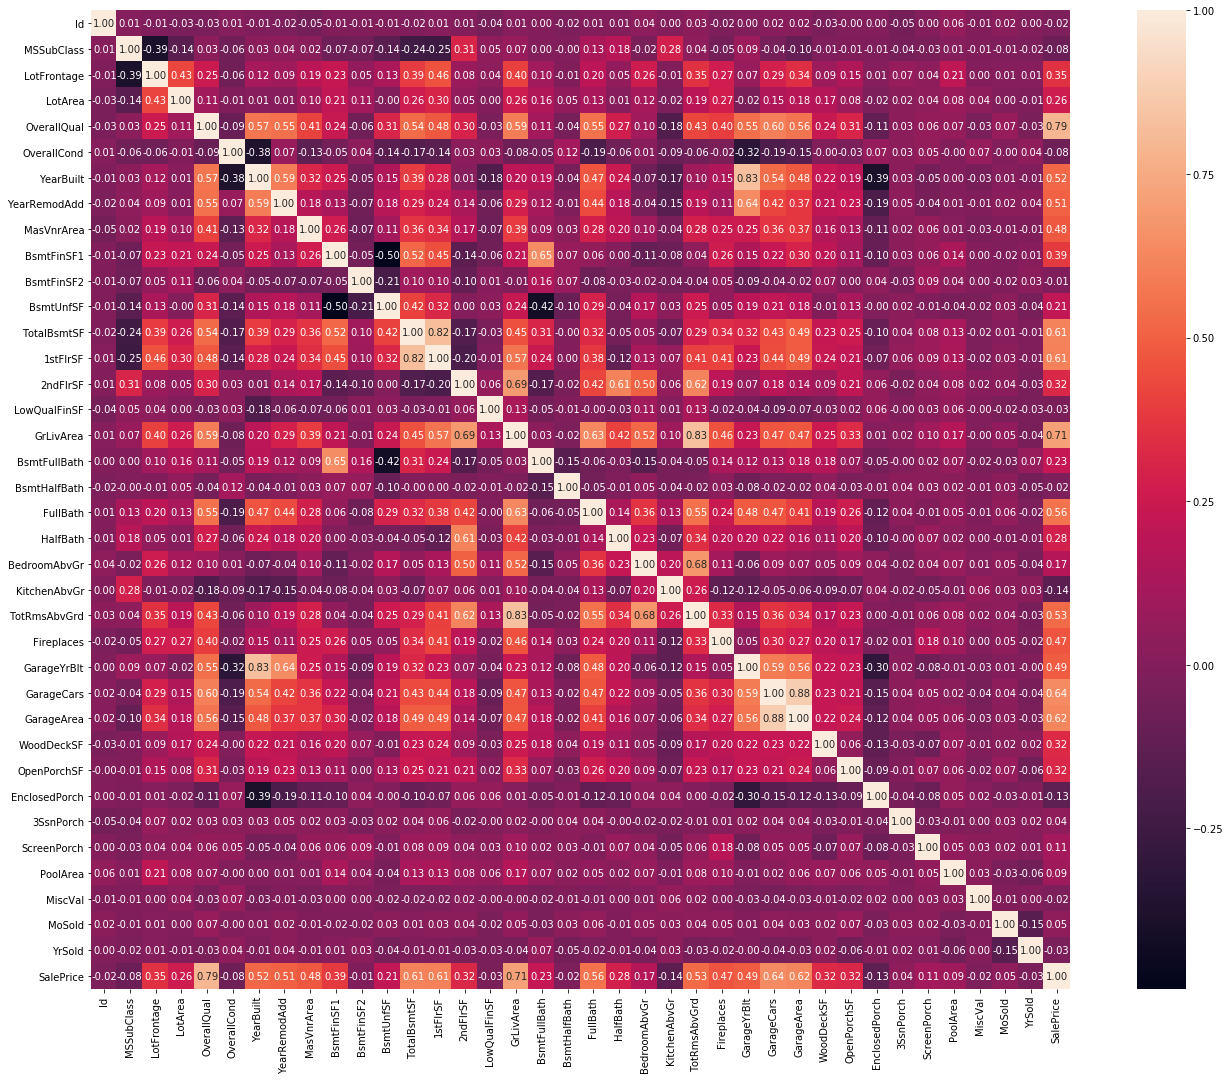

In [6]:
plt.figure(figsize=(24, 18))
sns.heatmap(data.corr(),annot=True, square=True, fmt='.2f')
plt.show()

In [7]:
np.abs(data.corr()["SalePrice"]).sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [8]:
np.abs(data.corr()["OverallQual"]).sort_values(ascending=False).head(20)

OverallQual     1.000000
SalePrice       0.790982
GarageCars      0.600671
GrLivArea       0.593007
YearBuilt       0.572323
GarageArea      0.562022
YearRemodAdd    0.550684
FullBath        0.550600
GarageYrBlt     0.547766
TotalBsmtSF     0.537808
1stFlrSF        0.476224
TotRmsAbvGrd    0.427452
MasVnrArea      0.411876
Fireplaces      0.396765
OpenPorchSF     0.308819
BsmtUnfSF       0.308159
2ndFlrSF        0.295493
HalfBath        0.273458
LotFrontage     0.251646
BsmtFinSF1      0.239666
Name: OverallQual, dtype: float64

In [9]:
#One Hot Encoding
data = pd.get_dummies(data)
data=data.fillna(data.mean())

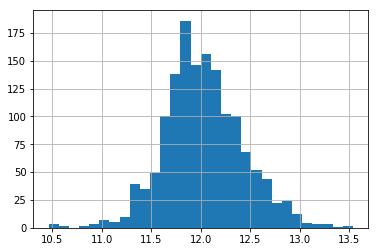

In [10]:
from scipy.stats import skew
data["SalePrice"] = np.log1p(data["SalePrice"])
#対数変換後の分布を確認
data["SalePrice"].hist(bins=30)
#カテゴリカルでない特徴量
non_categoricals = data.dtypes[data.dtypes != "object"].index
skewed_feats = data[non_categoricals].apply(lambda x: skew(x.dropna())).index
#歪度0.7より大きい特徴量を対数変換
data[skewed_feats] = np.log1p(data[skewed_feats])

In [11]:
data[skewed_feats].iloc[:,1:10]


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161
5,3.931826,4.454347,9.555064,1.791759,1.791759,7.597898,7.598900,0.000000,6.597146
6,3.044522,4.330733,9.218804,2.197225,1.791759,7.603399,7.603898,5.231109,7.222566
7,4.110874,4.263383,9.247925,2.079442,1.945910,7.587817,7.587817,5.484797,6.756932
8,3.931826,3.951244,8.719481,2.079442,1.791759,7.566311,7.576097,0.000000,0.000000
9,5.252273,3.931826,8.912069,1.791759,1.945910,7.570443,7.576097,0.000000,6.747587


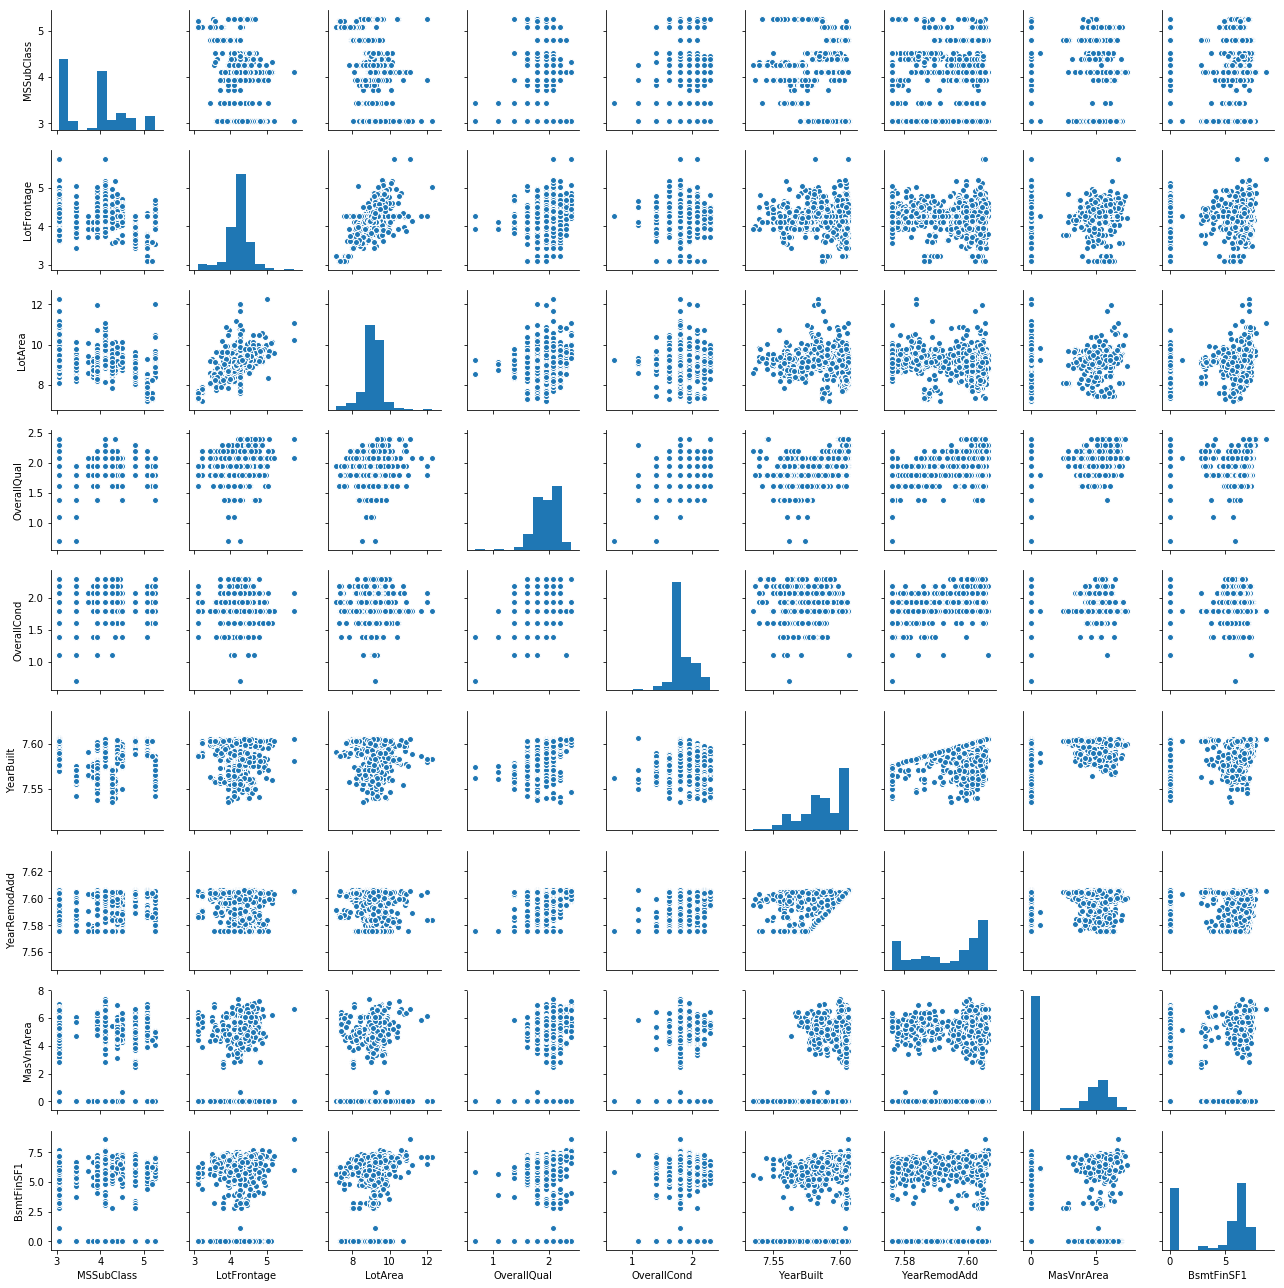

In [12]:
sns.pairplot(data[skewed_feats].iloc[:,1:10], size=2.0)
plt.show()

In [13]:
np.abs(data[skewed_feats].corr()["SalePrice"]).sort_values(ascending=False).head(10).index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF',
       'ExterQual_TA', 'YearBuilt', 'FullBath', 'YearRemodAdd',
       'TotRmsAbvGrd'],
      dtype='object')